In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Normalized SIS model with forward Euler
def SIS(S0,I0, beta, gamma, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    N = S0+I0
    s0 = S0/N
    i0 = I0/N

    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = s0
            I[idx] = i0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] + gamma * I[idx-1]
            dI_dt =  beta * S[idx-1] * I[idx-1] - gamma * I[idx-1]

            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize

    return S, I, T

def solve_sis(I0, beta, gamma, t_max, stepsize):
  T = np.arange(0,t_max+stepsize,stepsize)
  I = np.zeros(len(T))

  # set up variables
  Rn = beta/gamma
  K = (1 - (1/Rn))
  r = beta - gamma


  I = K / ( 1 + ((K - I0) / I0 ) * np.exp(-r*T))

  return I


# run model and plot
# S0, I0, beta, gamma = 99, 1, 3, 2
# S, I, T = SIS(S0, I0, beta, gamma, 100, 0.1)



# fig, ax = plt.subplots()
# ax.plot(T, S, color='b', label='Susceptible')
# ax.plot(T, I, color='red', label='Infected')
# ax.set_xlabel('Time')
# ax.set_ylabel('Population')
# ax.set_title('Normalized SIS Model')
# ax.legend()
plt.show()


1a. Simulate the solution to the normalized SIS model using β = 3 and γ = 2, and with (s0, i0) = (0.99, 0.01). Create three plots
ranging from t = 0 to t = 25. On the first, simulate using a step size ∆t = 2. On the second,
use ∆t = 1. On the third, use ∆t = 1/2 . In each plot, show only your solution’s I(t) in a red
solid line, labeled as “Forward Euler”, and then also plot the analytical solution from class in a
black dashed line, labeled as “Analytical.” Please also set the y-axis range to [0, 0.5].

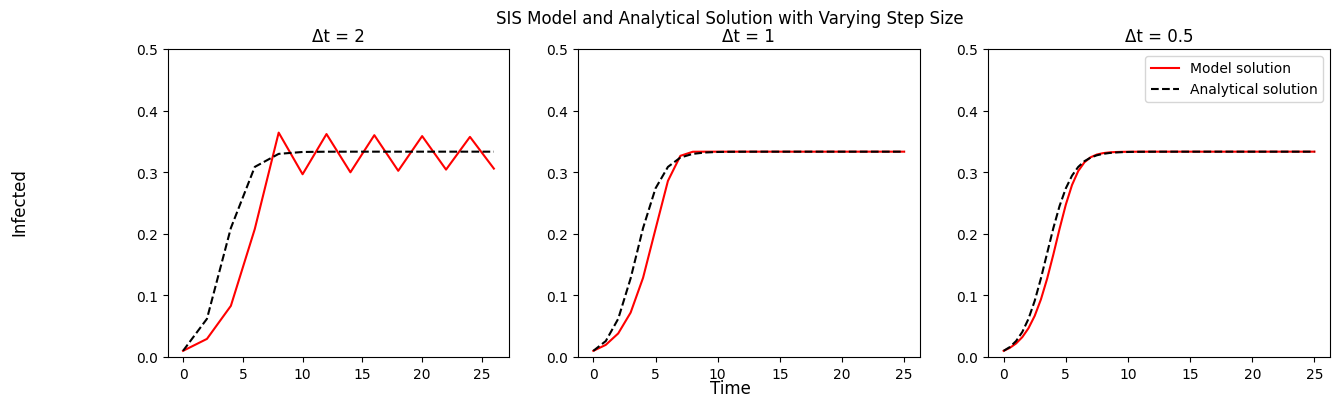

In [18]:
beta = 3
gamma = 2
S0, I0 = 99, 1
t_max = 25
step_sizes = [2, 1, 0.5]


fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, stepsize in zip(axes, step_sizes):

    #Solve analytical solution
    I_anal = solve_sis(0.01, beta, gamma, t_max, stepsize)

    #Solve model solution
    S, I, T = SIS(S0, I0, beta, gamma, t_max, stepsize)

    # plot
    ax.plot(T, I, color='red', label="Model solution")
    ax.plot(T, I_anal, color='black', ls='--', label="Analytical solution")
    ax.set_title(f"Δt = {stepsize}")
    ax.set_ylim([0, 0.5])

plt.suptitle("SIS Model and Analytical Solution with Varying Step Size")
fig.supxlabel("Time")
fig.supylabel("Infected")
plt.legend()
plt.savefig(f"SIS_model_vs_anal.png", bbox_inches='tight')
plt.show()
#

1b. Comment on what you see in your three plots. How does the step size affect our solution?

As expected, the step size had no impact on the analytical soluition however, for the modeled solution, the larger step size prevented the model from reaching equilibrium in t_max time, causing the modeled solution to osscillate around the analytical one. With time steps of 1 and 0.5, the modeled solution converged with the analytical at around the same point after t = 5, with the time step 1 solution converging slightly before the time step 0.5 solution

1c. Define the maximum absolute error for a simulation using a particular $\Delta t$ as $$E(\Delta t) = \max_{t} \big | I_{\text{Euler}, \Delta t} (t) - I_\text{analytical}(t) \big |\ .$$ Write a function that runs the appropriate simulation, computes the analytical solution, and returns $E$ without plotting.

In [19]:
def SIS_MaxAE(I0, beta, gamma, t_max, step_size):

    S0 = 1 - I0
    I_anal = solve_sis(I0, beta, gamma, t_max, step_size)
    S, I, T = SIS(S0, I0, beta, gamma, t_max, step_size)

    E = np.max(np.abs(I - I_anal))
    return E


# I0=0.01
# beta=3
# gamma=2
# t_max=25
# step_sizes = [2, 1, 0.5]
# for step_size in step_sizes:
#     E = SIS_MaxAE(I0, beta, gamma, t_max, step_size)
#     print(f"Max absolute error for step size {step_size}: {E}")


1d. Create a plot on log-log axes showing $E(\Delta t)$ vs $\Delta t$ for values $$\Delta t \in \{2,1,\tfrac{1}{2},\tfrac{1}{4},\tfrac{1}{8},\tfrac{1}{16},\tfrac{1}{32}\}$$

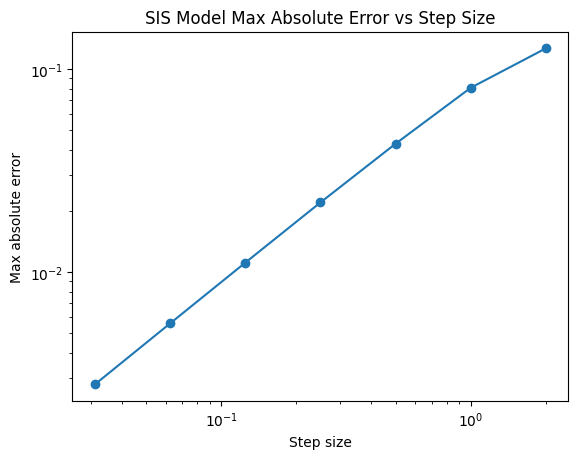

In [22]:
I0, beta, gamma, t_max=0.01, 3, 2, 25
step_sizes = [2, 1, 0.5, .25, 1/8, 1/16, 1/32]

ss_MaxAEs = {}

for step_size in step_sizes:
    ss_MaxAEs[step_size] = SIS_MaxAE(I0, beta, gamma, t_max, step_size)

step_sizes = np.array(step_sizes)
MaxAEs = np.array(list(ss_MaxAEs.values()))

plt.loglog(step_sizes, MaxAEs, 'o-')
plt.xlabel('Step size')
plt.ylabel('Max absolute error')
plt.title('SIS Model Max Absolute Error vs Step Size')
plt.savefig(f"MaxAE_vs_stepsize.png", bbox_inches='tight')
plt.show()

1e. Comment on what you observe in this plot, and comment on cases when you would want a larger or smaller step size, and why? Imagining yourself in an advisory position in your community, can you think of any scenario where there is a connection between the step size of your simulation and the ethics of your advice?



As step size increases, the maximum absolute error also increases. For an SIS model specifically, I don't think step size really matters as the solution can be solved analytically. However, for other infectious diesase models without an analytical solution, I would use a smaller step sizes accuracy is critical, such as forecasting potential outbreaks, and a larger step size when dynamics change slowly or computational requierments are larger than available resources. Ethically, I think it would be irresposible to base high-impact advice on simulations with unnecessarily high error. For example, if treatment resources are limited, I think it would be unethical to base their allocation on models with large step sizes that could miss outbreaks and delay treatment.



# 2. The goal of this problem is to get you thinking about the constraints on population contact structure and contact matrices, as well as sensitivity analyses.

2a. As one who is interested in modeling disease transmission on college campuses, you hire two teams to measure contact patterns on a nearby campus. The first team, led by Dan Pemic, tells you that there are $200$ faculty and $1800$ students, with a contact matrix of
	$$C_\text{Pemic} = \begin{pmatrix}
		3.1 & 43.5 \\
		4.7 & 25.0
	\end{pmatrix}$$
The second team, led by Flynn Uenza, tells you that there are $210$ faculty and $1750$ students, with a contact matrix of
	$$C_\text{Uenza} = \begin{pmatrix}
		3.0 & 44.5 \\
		4.8 & 25.1
		\end{pmatrix}
	$$
Whom do you trust more, Dan Pemic or Flynn Uenza? To answer this question, consider the self-consistency (or lack thereof) of each dataset. Explain your reasoning in words and include any calculations used to arrive at your conclusions.

I trust Pemic because the total faculty-student contacts (N1C12) should be consistent with the total student-faculty contacts(N2C21). Dan has the lower difference between N1C12 and N2C21